In [1]:
from tree_parser import file_contents, meta_math_database

from my_utils import print_proof_props_graph, get_proof_steps, print_ident_proof, print_proof_linear_steps
from my_utils import get_proof_steps_graph, print_proof_steps_graph


from expanding import construct_proof, expand_proof_step_ps

from collections import defaultdict

In [2]:
%%time

text = file_contents("set.mm")
database = meta_math_database(text,n=16080)

included 5555695 tokens from set.mm
proposition: 16080CPU times: user 5min 51s, sys: 1min 9s, total: 7min
Wall time: 8min 29s


In [4]:
context_values = dict()

for prop in database.propositions_list:
    for k, v in prop.f.items():
        if k in context_values:
            if v.statement != context_values[k]:
                print(k, v.statement, context_values[k])
                break
        else:
            context_values[k] = v.statement

In [5]:
context_values

{'wph': ['ph'],
 'wps': ['ps'],
 'wch': ['ch'],
 'wth': ['th'],
 'wta': ['ta'],
 'wet': ['et'],
 'wze': ['ze'],
 'wsi': ['si'],
 'wrh': ['rh'],
 'wmu': ['mu'],
 'wla': ['la'],
 'wka': ['ka'],
 'vx.wal': ['x'],
 'vx.cv': ['x'],
 'cA.wceq': ['A'],
 'cB.wceq': ['B'],
 'vx.tru': ['x'],
 'vy.tru': ['y'],
 'vx': ['x'],
 'vy': ['y'],
 'vz': ['z'],
 'vw': ['w'],
 'vt': ['t'],
 'vu': ['u'],
 'vv': ['v'],
 'v.vs': ['s'],
 'wcel.cA': ['A'],
 'wcel.cB': ['B'],
 'cbvex4v.vf': ['f'],
 'cbvex4v.vg': ['g'],
 'cA': ['A'],
 'cB': ['B'],
 'cC': ['C'],
 'cD': ['D'],
 'cF': ['F'],
 'cG': ['G'],
 'cE': ['E'],
 'cV': ['V'],
 'cR': ['R'],
 'cS': ['S'],
 'cW': ['W'],
 'cH': ['H'],
 'vs': ['s'],
 'cX': ['X'],
 'cT': ['T'],
 'cQ': ['Q'],
 'cY': ['Y'],
 'va': ['a'],
 'cN': ['N'],
 'cU': ['U'],
 'cM': ['M'],
 'vi': ['i'],
 'vj': ['j'],
 'cZ': ['Z'],
 'vr': ['r'],
 'vb': ['b'],
 'vc': ['c'],
 'vd': ['d'],
 've': ['e'],
 'cP': ['P'],
 'vf': ['f'],
 'vp': ['p'],
 'vk': ['k'],
 'cI': ['I'],
 'vg': ['g'],
 'vm': ['m'],

In [6]:
wff_class_props = {p.label: p for p in database.propositions_list if p.vclass in ["wff", "class"]}

In [8]:
import pickle

In [9]:
pickle.dump(wff_class_props, open("wff_class_props.pkl", "wb"))

In [3]:
for p in database.propositions_list:
    if "odd" in p.label:
        print(p.label)

moddiffl
moddifz
moddi
sqoddm1div8
fproddiv
fproddivf
fprodmodd
moddvds
mulmoddvds
fproddvdsd
odd2np1lem
odd2np1
oddm1even
oddp1even
oddnn02np1
oddge22np1
2tp1odd
sqoddm1div8z
oddp1d2
oddm1d2
ltoddhalfle
halfleoddlt
nn0oddm1d2
nnoddm1d2
sumodd
evensumodd
oddsumodd
oddpwp1fsum
flodddiv4
flodddiv4lt
flodddiv4t2lthalf
absproddvds
coprmproddvdslem
coprmproddvds
prm2orodd
oddprmgt2
oddprmge3
divgcdodd
isoddgcd1
oddprm
nnoddn2prm
oddn2prm
nnoddn2prmb
iserodd
oddprmdvds


pwunss


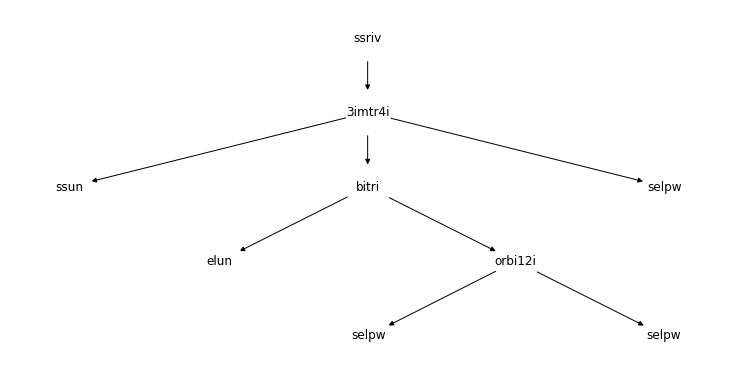

KeyError: 'cpw'

In [13]:
prop = database.propositions["pwunss"]
#prop = database.propositions_list[-1]
print(prop.label)
prop_proof = construct_proof(prop)
prop_proof.print_graph()
prop_proof.print_linear()

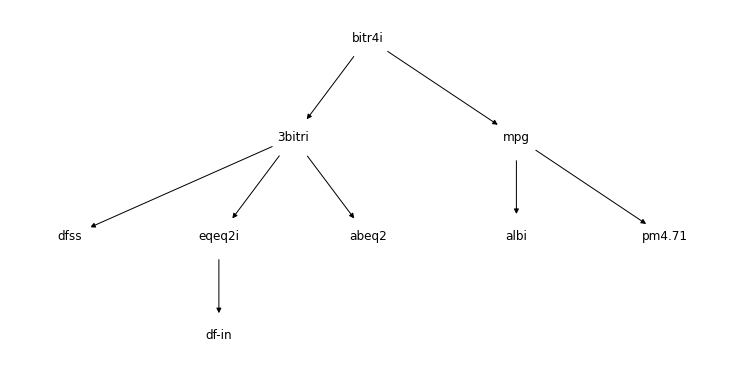

 <PStep:bitr4i ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>
 |  <PStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
 |  |  <PStep:eqeq2i ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
 |  |  |  <PStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
 |  |  <PStep:abeq2 ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  <PStep:mpg ⊢ ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:albi ⊢ ( ∀ x ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) ) → ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) ) )>
 |  |  <PStep:pm4.71 ⊢ ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>


In [4]:
prop_proof = prop_proof.inputs[1].expand()
prop_proof.print_graph()
prop_proof.print_linear()